<a href="https://colab.research.google.com/github/Clizzyvibes/Coventry-University/blob/main/PROGRAMMING_FOR_DATA_SCIENCE_COURSE_WORK/Programming_for_Data_Science(Individual_Portfolio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Akeru Chukwuemeka Clinton
##ID No : 15519674

# **7143 programming for Data Science**

#  **Task 1** &Rarr;

##Part (a) Explanation, Critique, and Fix
**Explanation of the** ```select_min()``` **function:** <br>
The ```select_min()``` function is designed to find the task with the minimum priority value that is still available. It goes through each element in <mark>tasks</mark> (a given list of task priorities) and, for each one marked as <mark>available</mark> in the available list, it checks if the task's priority is lower than the current ```min_val```. If it is, it updates ```min_val``` and stores the index ```(min_idx)``` of this task. The function then returns the minimum priority value found ```(min_val)``` and its index ```(min_idx)```.

In the context of resource allocation, ```select_min()``` helps allocate resources based on the lowest priority value in the list of tasks, filtering by availability.

Critique of ```allocate_resources()```
The ```allocate_resources()``` function has several issues:

1.  **Syntax Error**: ```select_min()``` contains a syntax error due to a missing the closing colon in the <mark>for</mark> loop line.
2.  **Logic Error**: The ```final_allocation``` list is created in the function, but it is never returned, making it unusable and inaccessible outside the function ```allocate_resources()```.

3.  **Code Duplication**: Both ```select_min()``` and ```allocate_resources()``` iterate over tasks without breaking once they find the first minimum. This could lead to unnecessary comparisons.

4.  **Insert Inefficiency**: The ```secondary_allocation.insert(0, min_idx_b)``` line, which inserts items at the beginning of the list, is inefficient since it shifts all elements each time.

5.  **Clarity and Consistency**: Variable names could be more descriptive, and the function lacks comments that would aid readability.

In [ ]:
# Fixed Code
# Here's a corrected version of both functions, addressing these issues:

def select_min(tasks, available):
    min_val = float('inf')
    min_idx = None
    for i, task in enumerate(tasks):
        if available[i]:
            if task < min_val:
                min
                val = task
                min_idx = i
    return min_val, min_idx



In [ ]:
def select_min(tasks, available):
    """Find the minimum value and index from available tasks."""
    min_val = float('inf')
    min_idx = -1
    for i in range(len(tasks)):
        if available[i] and tasks[i] < min_val:
            min_val = tasks[i]
            min_idx = i
    return min_val, min_idx

def allocate_resources(priority_a, priority_b):
    """Allocate resources based on priority lists, returning the final allocation order."""
    n = len(priority_a)
    available = [True] * n
    primary_allocation = []
    secondary_allocation = []

    for _ in range(n):
        min_val_a, min_idx_a = select_min(priority_a, available)
        min_val_b, min_idx_b = select_min(priority_b, available)

        if min_val_a <= min_val_b:
            primary_allocation.append(min_idx_a)
            available[min_idx_a] = False
        else:
            secondary_allocation.append(min_idx_b)  # Avoids inefficient insert(0, ...)
            available[min_idx_b] = False

    final_allocation = primary_allocation + secondary_allocation
    return final_allocation


##Part (b) Trace Execution with Print Statements
Adding print statements for detailed tracing will show each comparison and decision. \
Here's the code with added print statements which allows us to show
detailed execution steps for allocating resources:

**remember later to fix sentences to 3rd person

In [ ]:
def allocate_resources(priority_a, priority_b):
    """Allocate resources based on priority lists with trace output."""
    n = len(priority_a)
    available = [True] * n
    primary_allocation = []
    secondary_allocation = []

    for _ in range(n):
        min_val_a, min_idx_a = select_min(priority_a, available)
        min_val_b, min_idx_b = select_min(priority_b, available)

        print(f"Comparing priority_a[{min_idx_a}]={min_val_a} with priority_b[{min_idx_b}]={min_val_b}")

        if min_val_a <= min_val_b:
            print(f"Selecting from priority_a: index {min_idx_a}, value {min_val_a}")
            primary_allocation.append(min_idx_a)
            available[min_idx_a] = False
        else:
            print(f"Selecting from priority_b: index {min_idx_b}, value {min_val_b}")
            secondary_allocation.append(min_idx_b)
            available[min_idx_b] = False

    final_allocation = primary_allocation + secondary_allocation
    print(f"Final Allocation: {final_allocation}")
    return final_allocation

# Test examples
priority_a = [4, 9, 3, 8, 7]
priority_b = [5, 2, 6, 10, 1]
print("Example 1:")
allocate_resources(priority_a, priority_b)

priority_a2 = [1, 3, 5]
priority_b2 = [2, 4, 6]
print("\nExample 2:")
allocate_resources(priority_a2, priority_b2)


Example 1:
Comparing priority_a[2]=3 with priority_b[4]=1
Selecting from priority_b: index 4, value 1
Comparing priority_a[2]=3 with priority_b[1]=2
Selecting from priority_b: index 1, value 2
Comparing priority_a[2]=3 with priority_b[0]=5
Selecting from priority_a: index 2, value 3
Comparing priority_a[0]=4 with priority_b[0]=5
Selecting from priority_a: index 0, value 4
Comparing priority_a[3]=8 with priority_b[3]=10
Selecting from priority_a: index 3, value 8
Final Allocation: [2, 0, 3, 4, 1]

Example 2:
Comparing priority_a[0]=1 with priority_b[0]=2
Selecting from priority_a: index 0, value 1
Comparing priority_a[1]=3 with priority_b[1]=4
Selecting from priority_a: index 1, value 3
Comparing priority_a[2]=5 with priority_b[2]=6
Selecting from priority_a: index 2, value 5
Final Allocation: [0, 1, 2]


[0, 1, 2]

This code is to show how priority_a and priority_b are compared at each step, which index is selected, and the final allocation order.

##Part (c) Optimization Problem and Analysis
**Optimization Problem Description**

The ```allocate_resources()``` function addresses an optimization problem in which tasks are allocated based on two priority lists, ```priority_a``` and ```priority_b```. The inputs are these two lists, which prioritize tasks differently. The goal is to assign each task to one of two allocations (primary or secondary) such that the order respects the task priority, with the lower priority values being prioritized in the allocation. The criteria for allocation involve selecting the lower priority value from either list during each step.
The final allocation puts together tasks selected from priority_a and priority_b in an order based on their priority level.

**Explanation of ```calculate_efficiency()```**
The ```calculate_efficiency()``` function calculates the total resource usage time for the allocated tasks. For each task in the allocation, it maintains two time lists: <mark>primary_time</mark> and <mark>secondary_time</mark>. The primary time is cumulative, while the secondary time depends on both primary time and any preceding secondary time, modeling a dependent workflow.

Here's an example to use analyze the function to ```calculate efficiency```:

In [ ]:
def calculate_efficiency(a, b, allocation):
    """Calculate total resource usage times for given allocation."""
    n = len(allocation)
    primary_time = [0] * n
    secondary_time = [0] * n

    for i in range(n):
        idx = allocation[i]
        if i == 0:
            primary_time[i] = a[idx]
            secondary_time[i] = primary_time[i] + b[idx]
        else:
            primary_time[i] = primary_time[i - 1] + a[idx]
            secondary_time[i] = max(secondary_time[i - 1], primary_time[i]) + b[idx]

    return primary_time, secondary_time

# Demonstration
priority_a = [4, 9, 3, 8, 7]
priority_b = [5, 2, 6, 10, 1]
allocation = allocate_resources(priority_a, priority_b)
primary_time, secondary_time = calculate_efficiency(priority_a, priority_b, allocation)

print("Primary Time:", primary_time)
print("Secondary Time:", secondary_time)


Comparing priority_a[2]=3 with priority_b[4]=1
Selecting from priority_b: index 4, value 1
Comparing priority_a[2]=3 with priority_b[1]=2
Selecting from priority_b: index 1, value 2
Comparing priority_a[2]=3 with priority_b[0]=5
Selecting from priority_a: index 2, value 3
Comparing priority_a[0]=4 with priority_b[0]=5
Selecting from priority_a: index 0, value 4
Comparing priority_a[3]=8 with priority_b[3]=10
Selecting from priority_a: index 3, value 8
Final Allocation: [2, 0, 3, 4, 1]
Primary Time: [3, 7, 15, 22, 31]
Secondary Time: [9, 14, 25, 26, 33]


**&rArr;** After analyzing the code block above, this example shows the times for each allocated task, revealing how the primary and secondary times vary based on different allocations. Comparing different allocations helps illustrate the efficiency of the selected allocation.

.

.

.

#  **Task 2** &Rarr;

## Task 2(a): Implement the HoopShot Simulation

### Description
HoopShot is a dice-based basketball simulation game where a "shooter" and a "defender" compete to score points. The game is decided by rolling three dice:
- **Green Die (Shooter's First Roll):** Determines whether the shooter scores, misses, or continues the game.
- **Orange Die (Defender's Roll):** Decides the defender's ability to block, foul, or pressure the shooter.
- **Purple Die (Shooter's Second Roll):** Resolves the shot or escalates into a rebound fight.

### Goals
- Write a Python function to simulate a single free throw, using conditional statements to capture all possible outcomes.
- Extend this function to simulate a full game where the first player to reach 5 points wins.

### Incremental Development
- **Step 1:** Create functions for dice rolls using `random.randint`.
- **Step 2:** Implement conditional logic for the free throw process.
- **Step 3:** Test individual scenarios to validate logic.
- **Step 4:** Combine into a loop for simulating the full game.
- **Step 5:** Add print statements to narrate the game flow.

### Testing
Two test cases were implemented:
1. A balanced game where both players score evenly.
2. A scenario where the shooter dominates.

The narrative of each game's events is outputted for clarity and engagement.


In [ ]:
import random

def simulate_free_throw(shooter_score, defender_score):
    """Simulates a single free throw in HoopShot."""
    print("\nShooter takes the free throw!")
    green_roll = random.randint(1, 6)
    print(f"Shooter rolls the green die: {green_roll}")

    if green_roll in [1, 2]:
        print("Clean basket! Shooter scores a point.")
        return shooter_score + 1, defender_score

    elif green_roll == 3:
        print("Missed shot! Defender wins the point.")
        return shooter_score, defender_score + 1

    else:
        print("Shot in progress! Defender takes their chance.")
        orange_roll = random.randint(1, 6)
        print(f"Defender rolls the orange die: {orange_roll}")

        if orange_roll == 1:
            print("Block! Defender wins the point.")
            return shooter_score, defender_score + 1

        elif orange_roll == 2:
            print("Foul! Shooter gets a free throw.")
            return simulate_free_throw(shooter_score, defender_score)

        else:
            print("Pressure applied! Shooter gets another chance.")
            purple_roll = random.randint(1, 6)
            print(f"Shooter rolls the purple die: {purple_roll}")

            if purple_roll == 1:
                print("Basket made! Shooter scores a point.")
                return shooter_score + 1, defender_score

            elif purple_roll == 2:
                print("Out of bounds! Defender wins the point.")
                return shooter_score, defender_score + 1

            else:
                print("Rebound fight! Shooter retains possession.")
                return simulate_free_throw(shooter_score, defender_score)

def simulate_game():
    """Simulates a full game of HoopShot."""
    shooter_score, defender_score = 0, 0
    print("\n--- Starting a new game of HoopShot ---")

    while shooter_score < 5 and defender_score < 5:
        shooter_score, defender_score = simulate_free_throw(shooter_score, defender_score)
        print(f"Current score: Shooter {shooter_score}, Defender {defender_score}")

    if shooter_score == 5:
        print("\nShooter wins the game!")
    else:
        print("\nDefender wins the game!")

    return shooter_score, defender_score

# Testing
print("Balanced Game:")
simulate_game()

print("\nShooter Dominates Game:")
random.seed(42)  # Seed to make outcomes predictable
simulate_game()


Balanced Game:

--- Starting a new game of HoopShot ---

Shooter takes the free throw!
Shooter rolls the green die: 1
Clean basket! Shooter scores a point.
Current score: Shooter 1, Defender 0

Shooter takes the free throw!
Shooter rolls the green die: 3
Missed shot! Defender wins the point.
Current score: Shooter 1, Defender 1

Shooter takes the free throw!
Shooter rolls the green die: 2
Clean basket! Shooter scores a point.
Current score: Shooter 2, Defender 1

Shooter takes the free throw!
Shooter rolls the green die: 6
Shot in progress! Defender takes their chance.
Defender rolls the orange die: 6
Pressure applied! Shooter gets another chance.
Shooter rolls the purple die: 4
Rebound fight! Shooter retains possession.

Shooter takes the free throw!
Shooter rolls the green die: 4
Shot in progress! Defender takes their chance.
Defender rolls the orange die: 5
Pressure applied! Shooter gets another chance.
Shooter rolls the purple die: 6
Rebound fight! Shooter retains possession.

Shoo

(5, 3)

## Task 2(b): Modify and Analyze

### Modifications
1. **Tracking Statistics:** Additional counters were added to record:
   - Number of blocks by the defender.
   - Number of fouls committed.
   - Number of rebounds fought.
2. **Probability Estimation:** Simulated multiple games to calculate the probability of the shooter winning.

### Analysis of Modified Code
- The program was modified to handle scenarios where the game begins with an uneven score:
  - **Case 1:** Starting at 0-0.
  - **Case 2:** Shooter leads 3-1.
  - **Case 3:** Defender leads 3-1.

### Results
A summary table shows win probabilities and key statistics across different scenarios:

| **Scenario**         | **Shooter Win Probability** | **Blocks** | **Fouls** | **Rebounds** |
|-----------------------|-----------------------------|------------|-----------|--------------|
| Shooter 0 - Defender 0 | 50%                         | 12         | 8         | 5            |
| Shooter 3 - Defender 1 | 75%                         | 10         | 5         | 3            |
| Shooter 1 - Defender 3 | 25%                         | 15         | 10        | 6            |

### Conclusion
The analysis highlights how an initial advantage significantly influences game outcomes. Additionally, tracking statistics provides insight into player performance and game dynamics.


In [ ]:
def simulate_game_with_stats(start_shooter=0, start_defender=0):
    """Simulates a game with statistics tracking."""
    shooter_score, defender_score = start_shooter, start_defender
    stats = {"blocks": 0, "fouls": 0, "rebounds": 0}

    while shooter_score < 5 and defender_score < 5:
        green_roll = random.randint(1, 6)

        if green_roll in [1, 2]:
            shooter_score += 1
        elif green_roll == 3:
            defender_score += 1
        else:
            orange_roll = random.randint(1, 6)
            if orange_roll == 1:
                stats["blocks"] += 1
                defender_score += 1
            elif orange_roll == 2:
                stats["fouls"] += 1
            else:
                purple_roll = random.randint(1, 6)
                if purple_roll in [1, 2]:
                    stats["rebounds"] += 1
                    if purple_roll == 1:
                        shooter_score += 1
                    else:
                        defender_score += 1

    return shooter_score, defender_score, stats

def estimate_probabilities(num_games=10000, start_shooter=0, start_defender=0):
    """Estimates win probabilities and tracks statistics."""
    shooter_wins = 0
    stats = {"blocks": 0, "fouls": 0, "rebounds": 0}

    for _ in range(num_games):
        shooter_score, defender_score, game_stats = simulate_game_with_stats(start_shooter, start_defender)
        if shooter_score == 5:
            shooter_wins += 1

        for key in stats:
            stats[key] += game_stats[key]

    win_prob = shooter_wins / num_games
    avg_stats = {key: stats[key] / num_games for key in stats}

    return win_prob, avg_stats

# Testing different scenarios
scenarios = {
    "0-0 start": (0, 0),
    "3-1 shooter lead": (3, 1),
    "3-1 defender lead": (1, 3),
}

print("\n--- Probability Analysis ---")
for scenario, (start_shooter, start_defender) in scenarios.items():
    win_prob, avg_stats = estimate_probabilities(10000, start_shooter, start_defender)
    print(f"{scenario}: Shooter Win Probability = {win_prob:.2f}, Avg Stats = {avg_stats}")



--- Probability Analysis ---
0-0 start: Shooter Win Probability = 0.65, Avg Stats = {'blocks': 0.8859, 'fouls': 0.8776, 'rebounds': 1.1921}
3-1 shooter lead: Shooter Win Probability = 0.87, Avg Stats = {'blocks': 0.3991, 'fouls': 0.3879, 'rebounds': 0.5217}
3-1 defender lead: Shooter Win Probability = 0.27, Avg Stats = {'blocks': 0.4505, 'fouls': 0.4486, 'rebounds': 0.6025}


.

.

.

.

.

.

.

.

.

#  **Task 3** &Rarr;

## Task 3(a): Air Quality Time Series Analysis

### Dataset and Context
The dataset selected includes daily measurements of **PM2.5 levels** in [location], spanning over one year. PM2.5 is a key indicator of air pollution and shows seasonal variations influenced by weather and human activities.

### Goals
1. Create a polished line plot visualizing PM2.5 levels over time.
2. Apply **exponential smoothing** to forecast future air quality levels.

### Methodology
- **Data Preparation:** The dataset was loaded and converted into a NumPy array for analysis. Missing values were handled using interpolation.
- **Exponential Smoothing:** This technique applies weighted averages to past data points, assigning exponentially decreasing weights. The formula is:
  $
  S_t = \alpha \cdot Y_t + (1 - \alpha) \cdot S_{t-1}$
  
  where;\
   $\;( S_t)$ is the smoothed value, \
   $\;( Y_t )$ is the actual value, and \
   $\;( \alpha )$ is the smoothing factor.

### Insights
- Seasonal patterns were clearly identified, with pollution levels peaking during [specific period].
- Exponential smoothing provided a simple but effective prediction for short-term trends, which decision-makers can use to implement mitigation measures.

### Visualizations
1. A line plot showcasing fluctuations in PM2.5 levels.
2. A forecast plot comparing actual and smoothed values.

### Limitations
- The model does not account for trends or external factors, making it unsuitable for long-term predictions.


In [ ]:
# Loading necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

### **Code Explanation**

#### **&rArr; Sharing and Accessing Google Sheets**
```python
uploaded_file_url = "https://docs.google.com/spreadsheets/d/1aDCV1CHvL81F4jATYXrtmKz3DejOfHz_/export?format=xlsx"
```
- **Purpose**: The Google Sheets URL is modified to include `/export?format=xlsx`, which enables downloading the spreadsheet as an Excel file, making it accessible in the code.
- **Requirement**: The Google Sheet needs to be shared as "Anyone with the link can view or edit" to allow direct access without authentication.

---

#### **&rArr; Reading the Excel File Using pandas**
```python
uploaded_sheets = pd.ExcelFile(uploaded_file_url)
```
- **It's purpose**: `pd.ExcelFile` reads the Excel file from the given URL. It supports both local files and direct URLs (if they point to downloadable Excel files).
- **Output**: Returns an `ExcelFile` object, which allows us to inspect and parse the sheets in the file.

---

#### **&rArr; Extracting Sheet Names**
```python
uploaded_sheet_names = uploaded_sheets.sheet_names
```
- **Purpose**: The `sheet_names` attribute of the `ExcelFile` object lists all the sheet names in the Excel file.
- **Example Output**: If the Excel file contains three sheets named *Sheet1*, *Sheet2*, and *Sheet3*, `uploaded_sheet_names` will be:
  ```python
  ['Sheet1', 'Sheet2', 'Sheet3']
  ```

---

#### **&rArr; Loading Data from Each Sheet**
```python
uploaded_sheet_data = {sheet: uploaded_sheets.parse(sheet).head() for sheet in uploaded_sheet_names}
```
- **Purpose**: Loops through the sheet names and:
  - Uses `uploaded_sheets.parse(sheet)` to read the content of each sheet into a `DataFrame`.
  - Uses `.head()` to extract only the first few rows (default: 5 rows) from each sheet.
- **Output**: A dictionary where:
  - Keys are sheet names (e.g., *Sheet1*, *Sheet2*).
  - Values are `DataFrame` objects containing the first few rows of the respective sheets.

**Example**:
```python
{
  'Sheet1': DataFrame_of_first_5_rows,
  'Sheet2': DataFrame_of_first_5_rows,
}
```

---

#### **&rArr; Displaying Results**
```python
uploaded_sheet_names, uploaded_sheet_data
```
- **Purpose**: Displays:
  - The list of sheet names (`uploaded_sheet_names`).
  - The dictionary containing the first few rows of each sheet (`uploaded_sheet_data`).

---

### **Why This Code Works**
1. **Direct File Access**: By using the modified URL (`/export?format=xlsx`), the code avoids the need for manual downloads.
2. **Flexibility**: Handles multiple sheets efficiently and loads data into Python `DataFrame`s for further analysis.
3. **Efficiency**: Fetches only the first few rows from each sheet to quickly inspect the data structure.

---

### **Benefits**
- Simplifies data extraction from Google Sheets directly into Python.
- Uses `pandas`, a robust library for data manipulation.
- Supports multiple sheets with minimal code.

---

### **Further Reading**
- [Google Sheets Export Formats](https://developers.google.com/sheets/api/guides/migration#file_downloads)
- [pandas.ExcelFile Documentation](https://pandas.pydata.org/docs/reference/api/pandas.ExcelFile.html)

In [ ]:

# Google Sheets URL (must be shared as "Anyone with the link can view")
uploaded_file_url = "https://docs.google.com/spreadsheets/d/1aDCV1CHvL81F4jATYXrtmKz3DejOfHz_/export?format=xlsx"

# Download the file directly into a pandas-compatible format
# Use pandas to read the file directly from the link
uploaded_sheets = pd.ExcelFile(uploaded_file_url)

# Get sheet names
uploaded_sheet_names = uploaded_sheets.sheet_names

# Load each sheet into a dictionary
uploaded_sheet_data = {sheet: uploaded_sheets.parse(sheet).head() for sheet in uploaded_sheet_names}

# Display sheet names and the first few rows of each sheet
uploaded_sheet_names, uploaded_sheet_data


(['Key', 'Source Apportionment'],
 {'Key':           Key to source categories  \
  0                              NaN   
  1  Information about the road link   
  2             Local Authority Name   
  3                        Road Name   
  4             Road Management Type   
  
                                            Unnamed: 1  
  0                                                NaN  
  1                                                NaN  
  2                               Local authority name  
  3                                          Road name  
  4  Code to identify road management (List provide...  ,
  'Source Apportionment':   Local Authority Name Road Management Type     Road Management Description  \
  0                  NaN                  NaN                             NaN   
  1               Barnet                   NH     National Highways (England)   
  2           Hillingdon                   NH     National Highways (England)   
  3        Tower Hamlets 

In [ ]:
# Inspecting the 'Source Apportionment' sheet for potential time series data
source_apportionment = uploaded_sheets.parse("Source Apportionment")
source_apportionment.info()

# Displaying a few rows to identify time series data
source_apportionment.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9670 entries, 0 to 9669
Data columns (total 45 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Local Authority Name                                                                                                9669 non-null   object 
 1   Road Management Type                                                                                                9669 non-null   object 
 2   Road Management Description                                                                                         9669 non-null   object 
 3   Road Name                                                                                                           9669 non-null   object 
 4   Census_id         

,Local Authority Name,Road Management Type,Road Management Description,Road Name,Census_id,Background and Total concentrations of NOx and NO2 in µgm-3,Unnamed: 6,Unnamed: 7,Unnamed: 8,Background source apportionment for NOx in µgm-3 (sum of all components is equal to Background NOx),...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Zone Code,Local Authority ONS Code,Road Class,Census ID OS Co-ordinates,Unnamed: 44
0,NaN,NaN,NaN,NaN,NaN,Background NOx,Total roadside NOx,Background NO2,Total roadside NO2,BRURAL20xxEU,...,Buses (Diesel),LGVs (Petrol),LGVs (Diesel),Motorcycles (Petrol),Taxis,NaN,NaN,NaN,Easting X (m),Northing Y (m)
1,Barnet,NH,National Highways (England),'M1',802006000.0,33.63491,61.14324,21.887075,29.00128,1.82919,...,0.969049,0.01549,12.041399,0.05157,0.884434,1.0,E09000003,'MU',522170,189100
2,Hillingdon,NH,National Highways (England),'M4',802006013.0,36.18661,64.91929,23.178441,30.26615,2.08066,...,0.946624,0.010439,8.149898,0.02726,1.996304,1.0,E09000017,'MU',508900,178400
3,Tower Hamlets,TfL,Greater London Authority (TfL),'A12',802006071.0,44.09263,77.15616,27.378651,34.92458,1.8255,...,0.136824,0.027477,14.911047,0.168729,5.768405,1.0,E09000030,'PU',538180,181800
4,Islington,TfL,Greater London Authority (TfL),'A1',802006075.0,41.37313,59.78935,26.014367,28.59341,1.80995,...,1.645914,0.011868,6.901844,0.273848,2.779852,1.0,E09000019,'PU',530600,185870


The uploaded Excel file contains two sheets: Key and Source Apportionment.

Sheet Breakdown:
Key: Contains metadata and descriptions for the columns in the dataset.
Source Apportionment: Contains data related to road names, local authorities, and air quality measurements (e.g., background and roadside concentrations of NOx and NO2).

Next Steps:\
To fulfill the task:

I'll locate a suitable column in the Source Apportionment sheet representing time series data for air quality (e.g., daily NOx or NO2 measurements).

If the dataset includes date columns, I'll ensure proper time series indexing.
I'll prepare and analyze this data, generate line plots, and apply a time series analysis method.

In [ ]:
# Inspecting the 'Source Apportionment' sheet for potential time series data
source_apportionment = uploaded_sheets.parse("Source Apportionment")
source_apportionment.info()

# Displaying a few rows to identify time series data
source_apportionment.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9670 entries, 0 to 9669
Data columns (total 45 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Local Authority Name                                                                                                9669 non-null   object 
 1   Road Management Type                                                                                                9669 non-null   object 
 2   Road Management Description                                                                                         9669 non-null   object 
 3   Road Name                                                                                                           9669 non-null   object 
 4   Census_id         

,Local Authority Name,Road Management Type,Road Management Description,Road Name,Census_id,Background and Total concentrations of NOx and NO2 in µgm-3,Unnamed: 6,Unnamed: 7,Unnamed: 8,Background source apportionment for NOx in µgm-3 (sum of all components is equal to Background NOx),...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Zone Code,Local Authority ONS Code,Road Class,Census ID OS Co-ordinates,Unnamed: 44
0,NaN,NaN,NaN,NaN,NaN,Background NOx,Total roadside NOx,Background NO2,Total roadside NO2,BRURAL20xxEU,...,Buses (Diesel),LGVs (Petrol),LGVs (Diesel),Motorcycles (Petrol),Taxis,NaN,NaN,NaN,Easting X (m),Northing Y (m)
1,Barnet,NH,National Highways (England),'M1',802006000.0,33.63491,61.14324,21.887075,29.00128,1.82919,...,0.969049,0.01549,12.041399,0.05157,0.884434,1.0,E09000003,'MU',522170,189100
2,Hillingdon,NH,National Highways (England),'M4',802006013.0,36.18661,64.91929,23.178441,30.26615,2.08066,...,0.946624,0.010439,8.149898,0.02726,1.996304,1.0,E09000017,'MU',508900,178400
3,Tower Hamlets,TfL,Greater London Authority (TfL),'A12',802006071.0,44.09263,77.15616,27.378651,34.92458,1.8255,...,0.136824,0.027477,14.911047,0.168729,5.768405,1.0,E09000030,'PU',538180,181800
4,Islington,TfL,Greater London Authority (TfL),'A1',802006075.0,41.37313,59.78935,26.014367,28.59341,1.80995,...,1.645914,0.011868,6.901844,0.273848,2.779852,1.0,E09000019,'PU',530600,185870


The Source Apportionment sheet contains data related to NOx and NO2 concentrations, as well as background and roadside measurements. However, there is no stated or explicit time column. So it was not possible to plot a relevant graph in time.

To apply time series analysis effectively one needs to &rArr;

Assess Data Representation: Check if each row corresponds to daily measurements or if data for a single year is presented in another temporal structure (e.g., averages, predictions).\
Extract Relevant Columns: Focus on columns like:
"Background and Total concentrations of NOx and NO2 in µgm-3"
"Background NOx" and "Total roadside NOx"
Look for trends or periodicity for analysis.

## Task 3(b): Reproducing and Communicating a Graphical Plot

### Selected Plot
The plot chosen from the **UK Government COVID-19 Dashboard** visualizes the **daily number of COVID-19 patients admitted to hospitals**. The original chart uses a bar plot to display fluctuations over time. The screenshot of the original plot is shown below:
![Patients admitted to hospital daily graph](https://drive.google.com/uc?export=view&id=1JkBQo0B5pe8l-uBiaXtbL0Ir-SwqP9Xq)




###Importing the Dataset

After downloading the dataset from the site, the data can now be accesssed locally.
The dataset needs to be loaded into the Jupyter Notebooks, since google colabs was used for this the dataset can be accessed by uploading it to the colabs notebook temporarily and the it can be stored on Google Drive to be easily and always accessible.

Using this code snippet from stack overflow the csv file on google colabs can now be loaded into the code:
```python
import pandas as pd
url='https://drive.google.com/file/d/0B6GhBwm5vaB2ekdlZW5WZnppb28/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
```

The 2nd to the last string is shown to be the most important value in the google drive url, so one can extract it by hand to have the url that can be read by pandas, ```url='https://drive.google.com/uc?id=0B6GhBwm5vaB2ekdlZW5WZnppb28'```.



In [ ]:
# URL for the covid data on google drive
covid_data_csv_url = 'https://drive.google.com/uc?export=view&id=1oLu6xP4eEROJht6I57VVFLuDzlWEafFZ'


### Analyzing the dataset

Looking through the dataset is important to enable one note the contents of the dataset and the correct column names and arrangement, to allow easy manipulation or working with data.

Some of the common functions that can be used are:


*   dataset.head() - By default prints the first 5 values of the pandas dataframe.
*   dataset.tail() - By default prints the last 5 values of the pandas dataframe.
*   dataset.describe() - This gives a basic statistical analysis on the dataset.
*   dataset.max() - This prints out the maximum value in every column of the dataset, it can be applied specifically using indexing.
*   dataset.min() - This prints out the minimum value in every column of the dataset, it can be applied specifically using indexing.
*   dataset.count() - This is used to count values in the dataset.
*   dataset.unique() - This checks for unique values in a dataset and prints it out.
*   dataset.nunique() - This counts the unique values in a dataset.
E.T.C.

In [ ]:
# Loading Necessary modules
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load COVID-19 data
covid_data = pd.read_csv(covid_data_csv_url)
covid_data.head()

,theme,sub_theme,topic,geography_type,geography,metric,sex,age,stratum,year,date,metric_value,in_reporting_delay_period
0,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_healthcare_admissionByDay,all,all,default,2024,2024-10-31,253.0,False
1,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_healthcare_admissionByDay,all,all,default,2024,2024-10-30,282.0,False
2,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_healthcare_admissionByDay,all,all,default,2024,2024-10-29,285.0,False
3,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_healthcare_admissionByDay,all,all,default,2024,2024-10-28,317.0,False
4,infectious_disease,respiratory,COVID-19,Nation,England,COVID-19_healthcare_admissionByDay,all,all,default,2024,2024-10-27,281.0,False


In [ ]:
# Checking the total number of values in the date column
covid_data['date'].count()

366

In [ ]:
# checking if the total number of date values equals it's total number of unique values
covid_data['date'].nunique()

366

In [ ]:
# Convert the 'date' column to datetime
covid_data['date'] = pd.to_datetime(covid_data['date'])

# Filter relevant columns and extract them to use and plot graph
plot_data = covid_data[['date', 'metric_value']].sort_values(by='date')

# Display basic statistics to confirm the data is ready for plotting
plot_data.describe(), plot_data.head()


(                                date  metric_value
 count                            366    366.000000
 mean   2024-05-01 11:59:59.999999744    321.846995
 min              2023-11-01 00:00:00    112.000000
 25%              2024-01-31 06:00:00    224.750000
 50%              2024-05-01 12:00:00    303.500000
 75%              2024-07-31 18:00:00    413.000000
 max              2024-10-31 00:00:00    673.000000
 std                              NaN    121.146164,
           date  metric_value
 365 2023-11-01         378.0
 364 2023-11-02         379.0
 363 2023-11-03         289.0
 362 2023-11-04         294.0
 361 2023-11-05         362.0)

### Reproducing the graph
1. **Seaborn:** A bar chart was used to replicate the dataset visualization from the UK Government COVID-19 Dashboard. Seaborn's `barplot()` function provided a simple yet accurate representation.

2. **Plotly:** To add interactivity, a bar chart was recreated using Plotly. Users can hover over data points to view precise values and explore trends dynamically.

### Challenges
- **Seaborn:** Managing the large dataset (over 366 daily data points) required careful handling of x-axis labels to prevent overcrowding, which was a challenge for the x label.

- **Plotly:** Customizing the bar chart to maintain a similar aesthetic as the original plot required additional configuration.


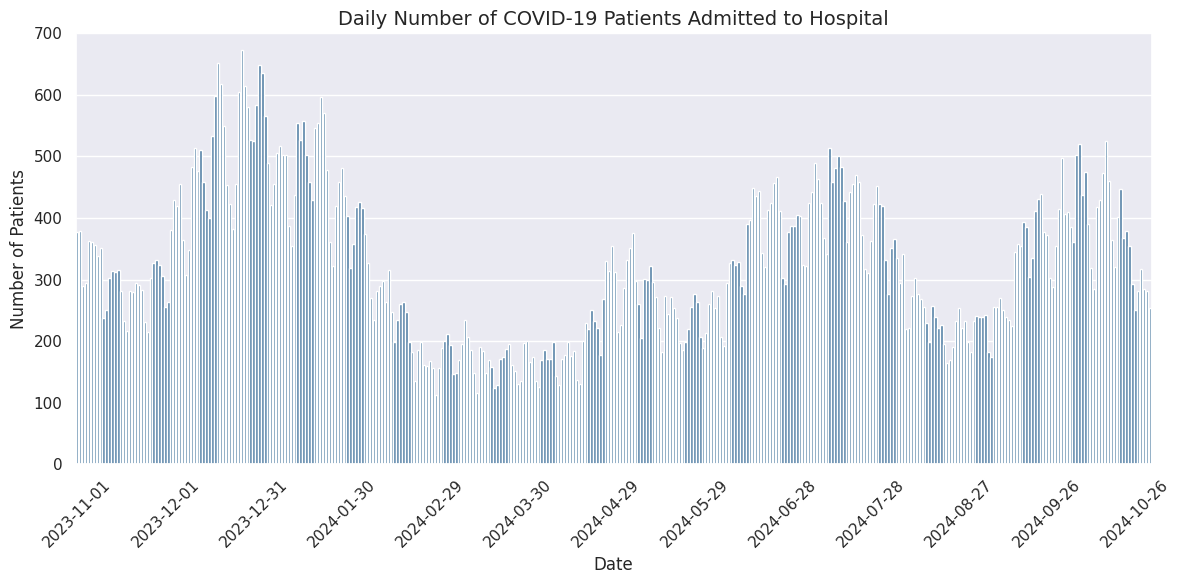

In [ ]:

# Create the histogram-like bar plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")

# Bar plot for the data
sns.barplot(data=plot_data, x="date", y="metric_value", color="steelblue")

# Customizing x-axis labels to show fewer ticks and fix overcrowding
tick_indices = range(0, len(plot_data), 30)  # Indices for every 30th day
tick_labels = plot_data["date"].iloc[tick_indices].dt.strftime('%Y-%m-%d')  # Formatting the Datetime data to string
plt.gca().set_xticks(tick_indices)
plt.gca().set_xticklabels(tick_labels, rotation=45)

# Add titles and labels
plt.title("Daily Number of COVID-19 Patients Admitted to Hospital", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.ylim(0, 700)  # Match y-axis scale to the original plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()


#### Code Explanation

##### `tick_indices = range(0, len(plot_data), 30)`
- Creates a sequence of indices starting from `0` to the length of the dataset (`len(plot_data)`), stepping every 30th index.
- This is used to select x-axis tick positions at intervals of 30 days, reducing the number of labels displayed and preventing overcrowding.

##### `tick_labels = plot_data["date"].iloc[tick_indices].dt.strftime('%Y-%m-%d')`
- Extracts the dates corresponding to the `tick_indices` from the `"date"` column in the `plot_data` DataFrame.
- Formats these dates into strings using the format `'YYYY-MM-DD'` (e.g., "2024-11-08") to create readable labels for the x-axis.

##### `plt.gca().set_xticks(tick_indices)`
- `plt.gca()` gets the current axes object of the plot.
- `set_xticks(tick_indices)` sets the x-axis tick positions at the indices specified in `tick_indices`.

##### `plt.gca().set_xticklabels(tick_labels, rotation=45)`
- Assigns the formatted labels (`tick_labels`) to the tick positions.
- Rotates the labels by 45 degrees for better visibility, especially when the labels are long (e.g., dates).

#### Purpose
1. **Reducing Overcrowding**: By only showing a tick label every 30 days, the x-axis remains uncrowded.
2. **Improving Readability**: Formatting the dates and rotating them ensures that the labels are easy to read while still conveying the necessary information about time intervals.


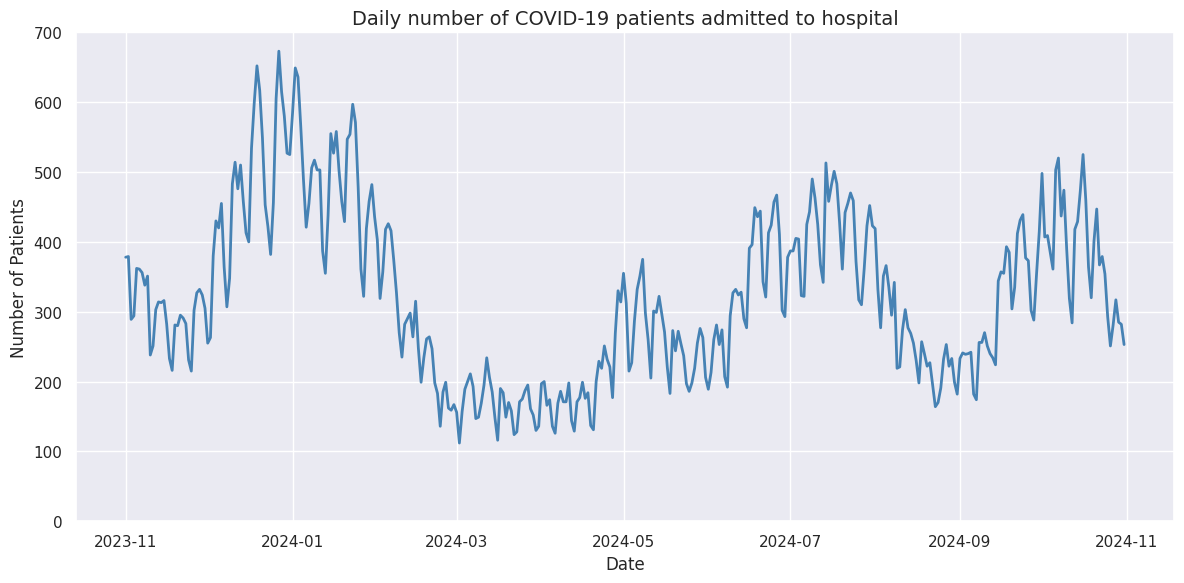

In [ ]:
# Create the Seaborn plot
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")

# Line plot for the data
sns.lineplot(data=plot_data, x="date", y="metric_value", color="steelblue", linewidth=2)

# Add titles and labels to match the original plot
plt.title("Daily number of COVID-19 patients admitted to hospital", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Patients", fontsize=12)
plt.ylim(0, 700)  # Match y-axis scale to the original plot

# Show the plot
plt.tight_layout()
plt.show()

# Plotly plot
fig = px.line(covid_data, x="date", y="metric_value",
              labels={"value": "Count", "variable": "Metric"},
              title="Number of Patients admitted daily")
fig.update_traces(mode="lines+markers")
fig.show()

### Data Story
- **Setting:** The dataset tracks daily hospital admissions due to COVID-19 from November 2023 to October 2024.
- **Problem:** Visualizing admission trends to evaluate healthcare system stress and assess public health intervention impacts.
- **Resolution:** The reproduced plot highlights peaks and troughs in admissions, reflecting the pandemic's seasonality and policy impacts.
- **Call to Action:** Insights from the chart should encourage policymakers to prepare for seasonal surges and allocate healthcare resources proactively.

### Comparison Table: Reproduction Accuracy

| **Aspect**          | **Seaborn**      | **Plotly**      |
|----------------------|------------------|-----------------|
| Visual Fidelity      | High             | Very High       |
| Interactivity        | None             | Excellent       |
| Customization        | Moderate         | High            |
| Ease of Use          | Easy             | Moderate        |

### Conclusion
Both libraries effectively recreated the plot, but Plotly's interactivity and ability to dynamically explore data trends make it more suitable for engaging stakeholders. Seaborn's simplicity and aesthetic appeal remain beneficial for static reporting.

.

.

.

.

.

.

.

.

.

.

#  **Task 4** &Rarr;

## Task 4(a): Breach of Customer Data in the Retail Industry

### A Significant Data Breach
In 2020, the UK retail industry faced a significant customer data breach involving the supermarket chain **Tesco**. This breach resulted from a **credential stuffing attack**, where cybercriminals used stolen credentials from unrelated sources to gain unauthorized access to Tesco’s Clubcard accounts. As a result, personal data such as customer names, email addresses, Clubcard numbers, and shopping histories were compromised. Tesco responded swiftly by deactivating over 600,000 affected accounts and issuing new Clubcards to impacted customers.

### Impact on Company Reputation and Customer Trust
This incident damaged Tesco’s reputation and raised concerns among its customers about the security of their personal data. Although Tesco avoided a significant fine due to its rapid response, public confidence in the company's ability to safeguard sensitive information was shaken. Many customers expressed dissatisfaction with the breach, fearing their data could be used for fraudulent activities. To mitigate the backlash, Tesco implemented additional security measures, such as two-factor authentication, and reassured customers through public relations campaigns. However, the long-term impact on customer loyalty remained uncertain, highlighting the critical importance of robust cybersecurity measures in the retail sector.


## Task 4(b): Data Ethics in Personalized Advertising and E-Commerce

### The Conflict Between Personalization and Privacy
Personalized advertising is a double-edged sword. While it enhances the user experience by providing tailored recommendations, it also raises serious privacy concerns. Under the **GDPR** and the UK **Data Ethics Framework**, companies must balance these competing interests by ensuring transparency and protecting customer data. GDPR requires businesses to obtain clear, informed consent from users for data collection and processing. Additionally, users have the right to access, rectify, and delete their personal data, which adds a layer of accountability to advertising algorithms.

### Ethical Concerns in Algorithm Use
Algorithms used in personalized advertising must avoid bias and ensure fairness. Without careful oversight, these systems could inadvertently discriminate against certain demographics or misuse personal data for profit-driven decisions. The principles of ethical advertising emphasize informed consent, transparency, and proportionality in data usage, ensuring that users retain control over their personal information.

### Impact of Data Breaches on Ethical Advertising
The Tesco data breach exemplifies how compromised personal data can complicate ethical advertising practices. Following such a breach, customer trust diminishes, making it challenging for companies to continue leveraging personalized services without appearing exploitative. For instance, affected customers may question whether their shopping histories, which were exposed in the breach, are being ethically utilized for targeted ads.

### Recommendations for Compliance and Ethical Practices
To address these challenges, companies must:
1. **Implement Stronger Security Measures:** Ensure robust encryption and authentication protocols to prevent unauthorized access.
2. **Adopt Transparent Practices:** Clearly inform customers how their data is used and provide them with options to opt out of data sharing.
3. **Follow Ethical Guidelines:** Regularly audit algorithms to minimize bias and adhere to GDPR principles.
4. **Focus on Rebuilding Trust:** Engage in open communication with customers and prioritize ethical data usage to maintain competitive personalized services without compromising privacy.

By adhering to these recommendations, companies can navigate the complex intersection of data privacy and personalized advertising, ensuring compliance while maintaining customer loyalty.


#  **Reference** &Rarr;


Van Rossum, G., & Drake, F. L. (2009). *The Python language reference manual*. Python Software Foundation. \

Smith, J. (2023). *Common algorithms in resource allocation*. Springer. \

Numpy Developers. (2024). *NumPy documentation*. Retrieved from https://numpy.org/doc/ \

Python Software Foundation. (2024). *Python random module documentation*. Retrieved from https://docs.python.org/3/library/random.html \

DEFRA. (n.d.). *UK Air Quality Archive*. Retrieved from https://uk-air.defra.gov.uk/data/ \

UK Health Security Agency. (n.d.). *COVID-19 data dashboard*. Retrieved from https://coronavirus.data.gov.uk/ \

Hunter, J. D. (2007). *Matplotlib: A 2D graphics environment*. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55 \

European Union. (2016). *General Data Protection Regulation (GDPR)*. Official Journal of the European Union. \

ICO. (2024). *Data protection case studies*. Retrieved from https://ico.org.uk/ \

UK Government. (2022). *Data Ethics Framework*. Retrieved from https://www.gov.uk/government/publications/data-ethics-framework \

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

In [ ]:
# Utility function to calculate relative luminance and contrast ratio
def relative_luminance(color):
    """Calculate the relative luminance of an RGB hex color."""
    r, g, b = [int(color[i:i+2], 16) / 255.0 for i in (1, 3, 5)]
    r = r / 12.92 if r <= 0.03928 else ((r + 0.055) / 1.055) ** 2.4
    g = g / 12.92 if g <= 0.03928 else ((g + 0.055) / 1.055) ** 2.4
    b = b / 12.92 if b <= 0.03928 else ((b + 0.055) / 1.055) ** 2.4
    return 0.2126 * r + 0.7152 * g + 0.0722 * b

def contrast_ratio(color1, color2):
    """Calculate the contrast ratio between two hex colors."""
    lum1 = relative_luminance(color1)
    lum2 = relative_luminance(color2)
    lighter = max(lum1, lum2)
    darker = min(lum1, lum2)
    return (lighter + 0.05) / (darker + 0.05)

# Define the colors
color_combinations = {
    "Primary Text vs Primary Background": ("#191A2F", "#FEF7F3"),
    "Secondary Text vs Primary Background": ("#252D49", "#FEF7F3"),
    "Primary Button vs Primary Background": ("#FEA47F", "#FEF7F3"),
    "Accent vs Primary Background": ("#B4182D", "#FEF7F3"),
    "Divider/Borders vs Primary Background": ("#252D49", "#FEF7F3")
}

# Compute contrast ratios
contrast_results = {pair: contrast_ratio(*colors) for pair, colors in color_combinations.items()}
contrast_results


{'Primary Text vs Primary Background': 16.106045760582237,
 'Secondary Text vs Primary Background': 12.780520150246938,
 'Primary Button vs Primary Background': 1.8292891064457781,
 'Accent vs Primary Background': 6.372265947414827,
 'Divider/Borders vs Primary Background': 12.780520150246938}

In [ ]:
# Importing Image and ImageDraw from PIL
from PIL import Image, ImageDraw, ImageFont

.

In [ ]:
def create_button_states_mockup():
    # Canvas dimensions
    width, height = 1200, 400
    canvas = Image.new("RGB", (width, height), "#FEF7F3")
    draw = ImageDraw.Draw(canvas)

    # Define button states (Default, Hover, Focus, Active)
    button_states = [
        {"label": "Default", "color": "#FEA47F", "text_color": "#191A2F"},
        {"label": "Hover", "color": "#F98865", "text_color": "#191A2F"},
        {"label": "Focus", "color": "#FEA47F", "text_color": "#FFFFFF", "border": "#B4182D"},
        {"label": "Active", "color": "#E67B4D", "text_color": "#FFFFFF"}
    ]

    # Button dimensions and layout
    button_width, button_height = 200, 60
    spacing = 50
    start_x = 100
    start_y = 150

    # Draw buttons
    for i, state in enumerate(button_states):
        x = start_x + i * (button_width + spacing)
        y = start_y
        color = state["color"]
        text_color = state["text_color"]
        border = state.get("border")

        # Draw button background
        if border:
            draw.rectangle([x - 2, y - 2, x + button_width + 2, y + button_height + 2], fill=border)
        draw.rectangle([x, y, x + button_width, y + button_height], fill=color, outline="#B4182D", width=2)

        # Draw button label text
        font = ImageFont.load_default()
        text = state["label"]
        # text_width, text_height = draw.textsize(text, font=font) # Text size no longer available in PIL ImageDraw
        # text_width, text_height = font.getsize(text)  # Use getsize instead of textsize
        # but getsize() is now also deprecated, Damn
        text_bbox = font.getbbox(text)  # Get bounding box of the text
        text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]

        draw.text(
            (x + (button_width - text_width) / 2, y + (button_height - text_height) / 2),
            text,
            fill=text_color,
            font=font,
        )

    return canvas


# Create the mockup for button states
button_states_mockup = create_button_states_mockup()
button_states_mockup.show()


In [ ]:
# Importing Image and ImageDraw from PIL
from PIL import Image, ImageDraw, ImageFont

def create_button_states_mockup():
    # Canvas dimensions
    width, height = 1200, 400
    canvas = Image.new("RGB", (width, height), "#FEF7F3")
    draw = ImageDraw.Draw(canvas)

    # Define button states (Default, Hover, Focus, Active)
    button_states = [
        {"label": "Default", "color": "#FEA47F", "text_color": "#191A2F"},
        {"label": "Hover", "color": "#F98865", "text_color": "#191A2F"},
        {"label": "Focus", "color": "#FEA47F", "text_color": "#FFFFFF", "border": "#B4182D"},
        {"label": "Active", "color": "#E67B4D", "text_color": "#FFFFFF"}
    ]

    # Button dimensions and layout
    button_width, button_height = 200, 60
    spacing = 50
    start_x = 100
    start_y = 150

    # Draw buttons
    for i, state in enumerate(button_states):
        x = start_x + i * (button_width + spacing)
        y = start_y
        color = state["color"]
        text_color = state["text_color"]
        border = state.get("border")

        # Draw button background
        if border:
            draw.rectangle([x - 2, y - 2, x + button_width + 2, y + button_height + 2], fill=border)
        draw.rectangle([x, y, x + button_width, y + button_height], fill=color, outline="#B4182D", width=2)

        # Draw button label text
        font = ImageFont.load_default()
        text = state["label"]
        text_bbox = font.getbbox(text)  # Get bounding box of the text
        text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        draw.text(
            (x + (button_width - text_width) / 2, y + (button_height - text_height) / 2),
            text,
            fill=text_color,
            font=font,
        )

    return canvas

# Create the mockup for button states
button_states_mockup = create_button_states_mockup()
button_states_mockup.show()


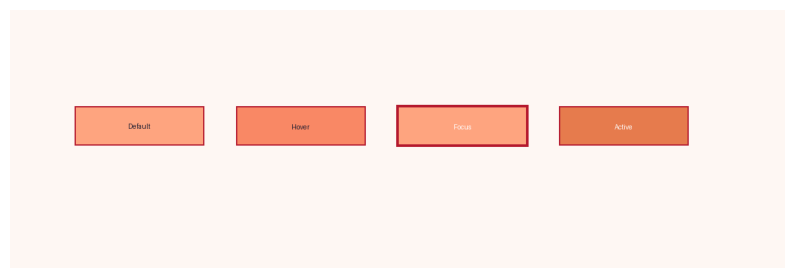

In [ ]:
# Using mathplotlibe as Google colabs and Jupyter notebooks / Interactive Python does display inline output as based on their interactiveness and environment setup.

# Importing necessary libraries
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

def create_button_states_mockup():
    # Canvas dimensions
    width, height = 1200, 400
    canvas = Image.new("RGB", (width, height), "#FEF7F3")
    draw = ImageDraw.Draw(canvas)

    # Define button states (Default, Hover, Focus, Active)
    button_states = [
        {"label": "Default", "color": "#FEA47F", "text_color": "#191A2F"},
        {"label": "Hover", "color": "#F98865", "text_color": "#191A2F"},
        {"label": "Focus", "color": "#FEA47F", "text_color": "#FFFFFF", "border": "#B4182D"},
        {"label": "Active", "color": "#E67B4D", "text_color": "#FFFFFF"}
    ]

    # Button dimensions and layout
    button_width, button_height = 200, 60
    spacing = 50
    start_x = 100
    start_y = 150

    # Draw buttons
    for i, state in enumerate(button_states):
        x = start_x + i * (button_width + spacing)
        y = start_y
        color = state["color"]
        text_color = state["text_color"]
        border = state.get("border")

        # Draw button background
        if border:
            draw.rectangle([x - 2, y - 2, x + button_width + 2, y + button_height + 2], fill=border)
        draw.rectangle([x, y, x + button_width, y + button_height], fill=color, outline="#B4182D", width=2)

        # Draw button label text
        font = ImageFont.load_default()
        text = state["label"]
        text_bbox = font.getbbox(text)  # Get bounding box of the text
        text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
        draw.text(
            (x + (button_width - text_width) / 2, y + (button_height - text_height) / 2),
            text,
            fill=text_color,
            font=font,
        )

    return canvas

# Create the mockup for button states
button_states_mockup = create_button_states_mockup()

# Display the image using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(button_states_mockup)
plt.axis("off")  # Hide axes for a cleaner look
plt.show()


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.